In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
print(torch.__version__)

2.1.0


# PyTorch Workflow

Machine learning is a game of two parts:

1. get data into a numerical representation
2. build a model to learn patterns in that numerical representation

## Data preparing and loading

In [2]:
def dataviz(*args, optional_label=None):
  """
    Generate a data visualization to compare training and test data along with predictions.

    Args:
      *data (tuple): A tuple containing the following elements in order:
        data[0] (array-like): X_train data for training.
        data[1] (array-like): y_train data for training.
        data[2] (array-like or none): X_test data for testing, or None if no test data is available.
        data[3] (array-like or none): y_test data for testing, or None if no test data is available.
        data[4] (array-like or None): y_pred data for predictions, or None if no predictions are available.

      optional_label (str, optional): A custom label for the test data in the plot. If not provided,
        it defaults to 'Test data'.

    This function generates a data visualization plot that allows for the visual comparison of
    training data (in blue), test data (in green), and predictions (in red) if available. You can
    specify a custom label for the test data in the plot using the optional_label parameter.

    Returns:
        None
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(args[0], args[1], c="blue", s=4, label='Training data')

  # plot test data in green
  if len(args) > 2 and args[2] is not None and args[3] is not None:
    plt.scatter(args[2], args[3], c="green", s=4, label=optional_label or 'Test data')

  # plot predictions in red
  if len(args) > 4 and args[4] is not None:
    plt.scatter(args[2], args[4], c="red", s=4, label='Predictions')

  plt.legend(prop={'size': 14})

In [3]:
X = torch.arange(start=0, end=1, step=0.02)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [4]:
weight = 0.7
bias = 0.3

y = bias + weight * X
y

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])

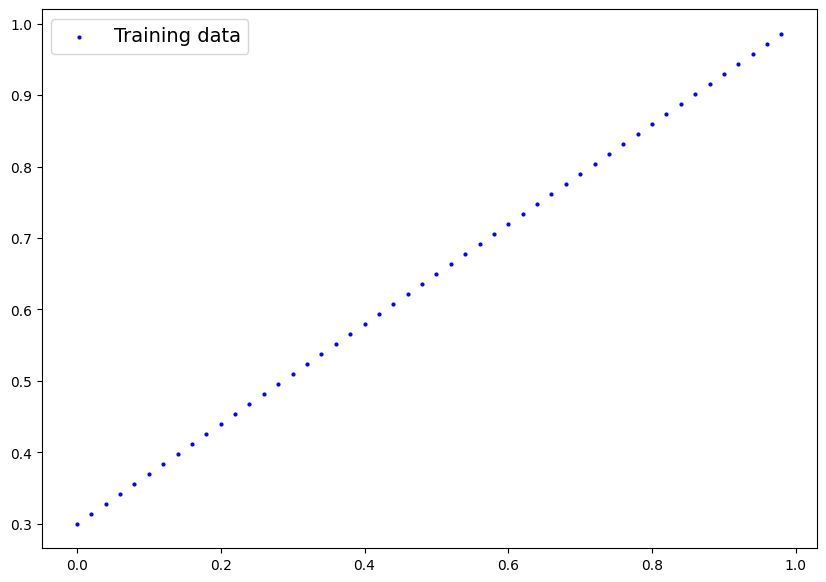

In [5]:
dataviz(X, y)

In [6]:
# manually splitting data into training and test sets
train_split = int(len(X) * 0.8)
train_split

40

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

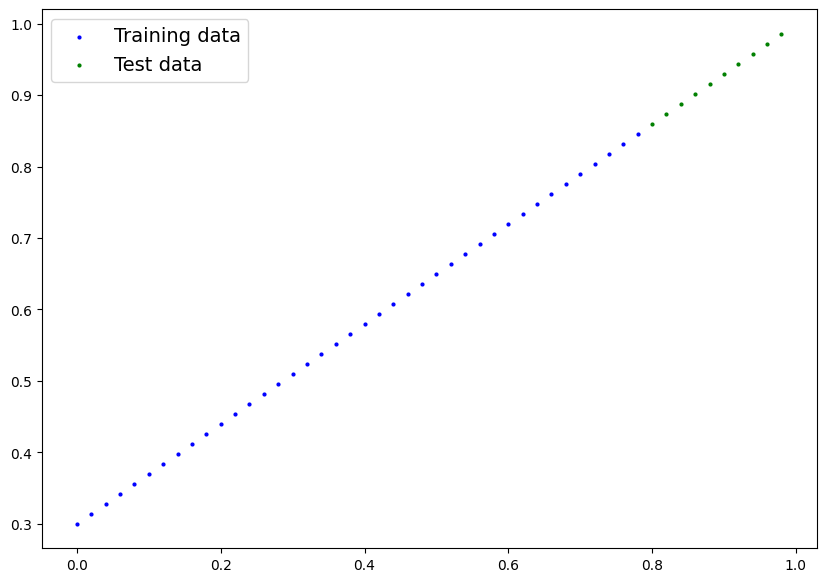

In [8]:
dataviz(X_train, y_train, X_test, y_test)

In [9]:
# using scikit-learn to split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

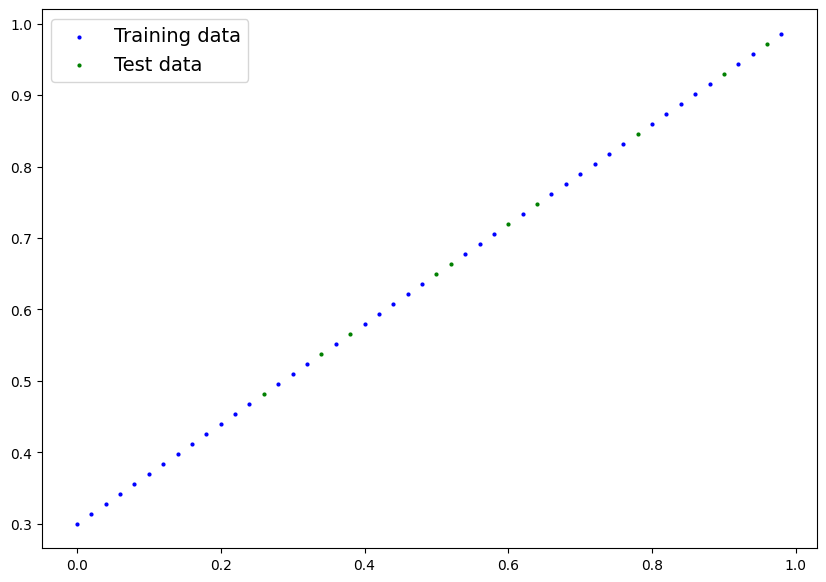

In [10]:
dataviz(X_train, y_train, X_test, y_test)

## Build model

In this example, we **know** how the data was created and the parameters that were used to create it. In a real-world scenario, we would not know these things. We would have to use the data to learn the parameters. In order to do this, the model starts with random parameters and updates them using *gradient descent* and *backpropagation*.

* `nn.Module`: base class for all neural network modules

* `nn.Parameter`: tensor to be added to `parameters()` iterator   initialize model parameters to be used in various computations (these could be different layers from `torch.nn`, single parameters, hard-coded values or functions)

* `requires_grad=True`: means PyTorch will track the gradients of this specific parameters for use with `torch.autograd` and gradient descent (for many `torch.nn` modules, `requires_grad=True` is set by default)

* `forward()`: any subclass of `nn.Module` needs to override `forward()` (this defines the forward pass of the model)

In [11]:
class LinearRegressionModel(nn.Module):
  """
    A linear regression model for fitting data generated by a linear function.

    This class represents a simple linear regression model with two learnable parameters:
    - weights: The coefficient for the linear relationship.
    - bias: The y-intercept.

    The model is used for predicting output values based on input features, assuming that the
    data follows a linear relationship. It can be trained using gradient descent to minimize
    the loss and fit the linear model to the given data.

    Attributes:
        weights (nn.Parameter): Learnable parameter for the linear coefficient.
        bias (nn.Parameter): Learnable parameter for the y-intercept.
    """
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, input_data: torch.tensor) -> torch.tensor:
    """
    Predicts output values based on input features.

    Args:
      input_data (torch.Tensor): Input features.

    Returns:
      torch.Tensor: Predicted output values.
    """
    return self.weights * input_data + self.bias

In [12]:
torch.manual_seed(42)

lr = LinearRegressionModel()

list(lr.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
y_pred = lr.forward(X_train)
y_pred

tensor([0.2096, 0.1557, 0.3780, 0.1827, 0.1490, 0.1692, 0.4049, 0.4386, 0.4453,
        0.2298, 0.1894, 0.2366, 0.2904, 0.3578, 0.3376, 0.1288, 0.4251, 0.3106,
        0.3510, 0.1625, 0.3241, 0.2029, 0.3712, 0.1355, 0.2702, 0.1423, 0.4184,
        0.3645, 0.2837, 0.3982, 0.1961, 0.2770, 0.2500, 0.4588, 0.2635, 0.1759,
        0.4116, 0.2231, 0.3174, 0.3847], grad_fn=<AddBackward0>)

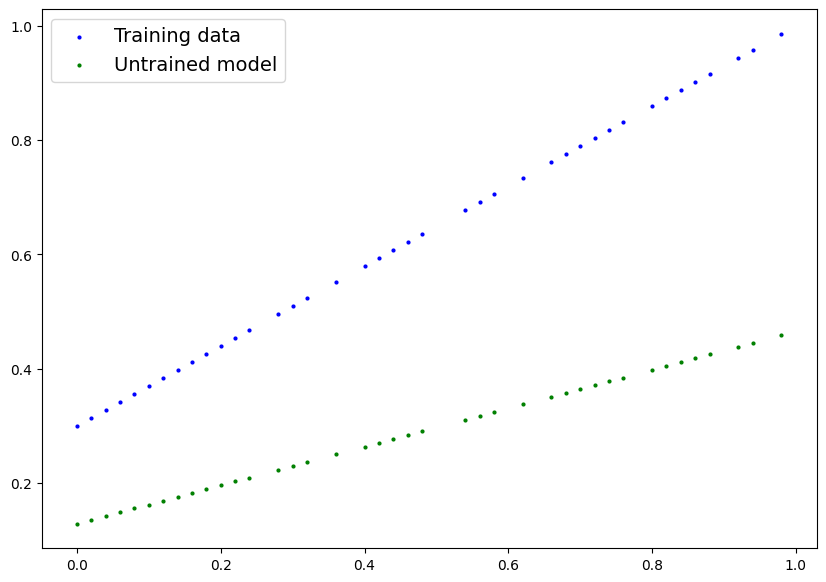

In [14]:
dataviz(X_train, y_train, X_train, y_pred.detach().numpy(), optional_label="Untrained model")

## References:

1. [Gradient descent - Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)
2. [Gradient descent - Youtube](https://www.youtube.com/watch?v=IHZwWFHWa-w)
3. [Backpropagation - Youtube](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
1. [Learning rate adjustment - Official documentation](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)
1. [Ground truth notebook](https://www.learnpytorch.io/01_pytorch_workflow/)